# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np

df = pd.read_csv('../data/raw/df.csv')
df

,Unnamed: 0,id_vivienda,folio,id_persona,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,0,1000901,100090101,1,16,2,4,3,3,72,2,1,1,1,6,1,1,3,1,199884
1,1,1000901,100090101,2,16,2,4,3,3,67,1,1,1,1,1,1,1,1,1,199884
2,2,1000901,100090101,3,16,2,4,3,3,40,2,5,1,8,1,1,1,1,1,199884
3,3,1000902,100090201,1,16,2,4,4,4,56,1,2,4,-88,6,1,1,3,1,67048
4,4,1000902,100090201,2,16,2,4,4,4,25,2,8,1,5,1,1,1,3,1,67048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202226,202226,4585804,458580401,2,9,1,3,3,3,8,1,,,1,,1,1,,1,1283333
202227,202227,4585804,458580401,3,9,1,3,3,3,46,1,1,1,11,1,2,1,1,1,1283333
202228,202228,4585807,458580701,1,9,1,3,3,3,31,2,2,1,8,1,1,1,3,1,500000
202229,202229,4585807,458580701,2,9,1,3,3,3,5,2,,,0,,2,1,,1,500000


In [2]:
# nueva columna id para identificador único por persona (según instrucciones de Casen 2022)
df['id'] = df['folio'].astype(str) + df['id_persona'].astype(str)

# Reordenar las columnas colocando 'id' al inicio
cols = ['id'] + [col for col in df.columns if col != 'id']
df = df[cols]

df.head()

,id,Unnamed: 0,id_vivienda,folio,id_persona,region,area,n_soceco,per_x_viv,per_x_hog,...,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,1000901011,0,1000901,100090101,1,16,2,4,3,3,...,2,1,1,1,6,1,1,3,1,199884
1,1000901012,1,1000901,100090101,2,16,2,4,3,3,...,1,1,1,1,1,1,1,1,1,199884
2,1000901013,2,1000901,100090101,3,16,2,4,3,3,...,2,5,1,8,1,1,1,1,1,199884
3,1000902011,3,1000902,100090201,1,16,2,4,4,4,...,1,2,4,-88,6,1,1,3,1,67048
4,1000902012,4,1000902,100090201,2,16,2,4,4,4,...,2,8,1,5,1,1,1,3,1,67048


In [3]:
#borrar columnas evidentemente innecesarias
df.drop(['Unnamed: 0', 'id_vivienda', 'folio', 'id_persona'], axis=1, inplace=True)
df.head()

/tmp/ipykernel_2718/2754966589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Unnamed: 0', 'id_vivienda', 'folio', 'id_persona'], axis=1, inplace=True)


,id,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,1000901011,16,2,4,3,3,72,2,1,1,1,6,1,1,3,1,199884
1,1000901012,16,2,4,3,3,67,1,1,1,1,1,1,1,1,1,199884
2,1000901013,16,2,4,3,3,40,2,5,1,8,1,1,1,1,1,199884
3,1000902011,16,2,4,4,4,56,1,2,4,-88,6,1,1,3,1,67048
4,1000902012,16,2,4,4,4,25,2,8,1,5,1,1,1,3,1,67048


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202231 entries, 0 to 202230
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            202231 non-null  object
 1   region        202231 non-null  int64 
 2   area          202231 non-null  int64 
 3   n_soceco      202231 non-null  int64 
 4   per_x_viv     202231 non-null  int64 
 5   per_x_hog     202231 non-null  int64 
 6   edad          202231 non-null  int64 
 7   sexo          202231 non-null  int64 
 8   ecivil        202231 non-null  object
 9   analf         202231 non-null  object
 10  educ          202231 non-null  int64 
 11  afil_sisprev  202231 non-null  object
 12  sprev_salud   202231 non-null  int64 
 13  nacionalidad  202231 non-null  int64 
 14  activ         202231 non-null  object
 15  ten_viv       202231 non-null  int64 
 16  ypch          202231 non-null  int64 
dtypes: int64(12), object(5)
memory usage: 26.2+ MB


Todas deben ser numéricas, ya que representan códigos con valores que se le asignarán una vez hecho el diccionario correspondiente.

In [5]:
# identificar columnas object y convertirlas a entero
columnas_objeto = df.select_dtypes(include=['object']).columns.tolist()
print(columnas_objeto)

def convertir_a_entero(df, columnas_objeto):
    for columna in columnas_objeto:
        try:
            df[columna] = pd.to_numeric(df[columna], errors='coerce').astype('Int64')
        except ValueError:
            print(f"No se pudo convertir la columna {columna} a entero. Verifica los datos.")

convertir_a_entero(df, columnas_objeto)

['id', 'ecivil', 'analf', 'afil_sisprev', 'activ']


/tmp/ipykernel_2718/2920209376.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = pd.to_numeric(df[columna], errors='coerce').astype('Int64')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202231 entries, 0 to 202230
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            202231 non-null  Int64
 1   region        202231 non-null  int64
 2   area          202231 non-null  int64
 3   n_soceco      202231 non-null  int64
 4   per_x_viv     202231 non-null  int64
 5   per_x_hog     202231 non-null  int64
 6   edad          202231 non-null  int64
 7   sexo          202231 non-null  int64
 8   ecivil        169151 non-null  Int64
 9   analf         166393 non-null  Int64
 10  educ          202231 non-null  int64
 11  afil_sisprev  110734 non-null  Int64
 12  sprev_salud   202231 non-null  int64
 13  nacionalidad  202231 non-null  int64
 14  activ         166393 non-null  Int64
 15  ten_viv       202231 non-null  int64
 16  ypch          202231 non-null  int64
dtypes: Int64(5), int64(12)
memory usage: 27.2 MB


In [7]:
df.head()

,id,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,1000901011,16,2,4,3,3,72,2,1,1,1,6,1,1,3,1,199884
1,1000901012,16,2,4,3,3,67,1,1,1,1,1,1,1,1,1,199884
2,1000901013,16,2,4,3,3,40,2,5,1,8,1,1,1,1,1,199884
3,1000902011,16,2,4,4,4,56,1,2,4,-88,6,1,1,3,1,67048
4,1000902012,16,2,4,4,4,25,2,8,1,5,1,1,1,3,1,67048


In [8]:
excel_file = pd.ExcelFile('../data/raw/diccionarios.xlsx')
excel_file

In [9]:
# diccionario principal para almacenar los datos de cada pestaña
diccionarios_completos = {}

# iterar sobre cada pestaña
pestañas_a_procesar = ['region','activ','n_soceco', 'area', 'sexo', 'ecivil', 'analf', 'educ', 'afil_sisprev', 'sprev_salud', 'nacionalidad', 'ten_viv']
for sheet_name in excel_file.sheet_names:
    if sheet_name in pestañas_a_procesar:
        # Leer la pestaña actual
        df_excel = excel_file.parse(sheet_name)

        # nombres de las columnas a buscar
        columnas_a_buscar = ['cod_region', 'region','cod_activ', 'activ', 'cod_n_soceco', 'n_soceco', 'cod_area', 'area', 'cod_sexo', 'sexo', 'cod_ecivil', 'ecivil', 'cod_analf', 'analf', 'cod_educ', 'educ', 'cod_afil_sisprev', 'afil_sisprev', 'cod_sprev_salud', 'sprev_salud', 'cod_nacion', 'nacionalidad', 'cod_ten_viv', 'ten_viv']

        # Encontrar las columnas existentes en la pestaña
        columnas_existentes = [col for col in df_excel.columns if col in columnas_a_buscar]

        # Crear el diccionario para la pestaña actual
        diccionario = df_excel[columnas_existentes].to_dict('list')
        diccionario_pestaña = {diccionario[columnas_existentes[0]][i]: diccionario[columnas_existentes[1]][i] for i in range(len(diccionario[columnas_existentes[0]]))}

        # Agregar el diccionario de la pestaña al diccionario principal
        diccionarios_completos[sheet_name] = diccionario_pestaña

diccionarios_completos

{'region': {1: 'Región de Tarapacá',
  2: 'Región de Antofagasta',
  3: 'Región de Atacama',
  4: 'Región de Coquimbo',
  5: 'Región de Valparaíso',
  6: "Región del Libertador Gral. Bernardo O'Higgins",
  7: 'Región del Maule',
  8: 'Región del Biobío',
  9: 'Región de La Araucanía',
  10: 'Región de Los Lagos',
  11: 'Región de Aysén del Gral. Carlos Ibáñez del Campo',
  12: 'Región de Magallanes y de la Antártica Chilena',
  13: 'Región Metropolitana de Santiago',
  14: 'Región de Los Ríos',
  15: 'Región de Arica y Parinacota',
  16: 'Región de Ñuble'},
 'activ': {1: 'Ocupados', 2: 'Desocupados', 3: 'Inactivos'},
 'n_soceco': {1: 'Bajo',
  2: 'Medio',
  3: 'Alto',
  4: 'Bajo-medio',
  5: 'Bajo-alto',
  6: 'Bajo-medio-alto',
  7: 'Medio-alto'},
 'area': {1: 'Urbano', 2: 'Rural'},
 'sexo': {1: 'Hombre', 2: 'Mujer'},
 'ecivil': {1: 'Casado(a)',
  2: 'Conviviente sin acuerdo de unión civil',
  3: 'Conviviente civil ',
  4: 'Anulado(a)',
  5: 'Separado(a)',
  6: 'Divorciado(a)',
  7: 'V

Ahora se deben aplicar los valores del diccionario al Dataframe, para poder analizar la información.

In [10]:
def aplicar_mapeos_vectorizado(df, mapeos):
    def mapper(value, column_mapeo):
        if column_mapeo is None:
            return value  # Devolver valor original si no hay mapeo para la columna
        if isinstance(column_mapeo, dict):
            return column_mapeo.get(value, value)  # Devolver valor original si no hay mapeo para el valor
        else:
            return value  # Devolver valor original si column_mapeo no es un diccionario

    df_mapeado = df.copy()
    for columna, serie in df.items():
        if columna in mapeos:
            df_mapeado[columna] = serie.map(lambda x: mapper(x, mapeos[columna]))
        else:
            df_mapeado[columna] = serie  # Mantener la columna sin cambios si no hay mapeo
    return df_mapeado

In [11]:
df_mapeado = aplicar_mapeos_vectorizado(df, diccionarios_completos)
df_mapeado

,id,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,1000901011,Región de Ñuble,Rural,Bajo-medio,3,3,72,Mujer,Casado(a),Lee y escribe,Básica incompleta,No cotiza,FONASA,Chile,Inactivos,Propia,199884
1,1000901012,Región de Ñuble,Rural,Bajo-medio,3,3,67,Hombre,Casado(a),Lee y escribe,Básica incompleta,AFP,FONASA,Chile,Ocupados,Propia,199884
2,1000901013,Región de Ñuble,Rural,Bajo-medio,3,3,40,Mujer,Separado(a),Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Ocupados,Propia,199884
3,1000902011,Región de Ñuble,Rural,Bajo-medio,4,4,56,Hombre,Conviviente sin acuerdo de unión civil,No lee ni escribe,np.nan,No cotiza,FONASA,Chile,Inactivos,Propia,67048
4,1000902012,Región de Ñuble,Rural,Bajo-medio,4,4,25,Mujer,Soltero(a),Lee y escribe,Media humanista completa,AFP,FONASA,Chile,Inactivos,Propia,67048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202226,4585804012,Región de La Araucanía,Urbano,Alto,3,3,8,Hombre,NaN,NaN,Básica incompleta,NaN,FONASA,Chile,NaN,Propia,1283333
202227,4585804013,Región de La Araucanía,Urbano,Alto,3,3,46,Hombre,Casado(a),Lee y escribe,Profesional completo,AFP,Isapre,Chile,Ocupados,Propia,1283333
202228,4585807011,Región de La Araucanía,Urbano,Alto,3,3,31,Mujer,Conviviente sin acuerdo de unión civil,Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Inactivos,Propia,500000
202229,4585807012,Región de La Araucanía,Urbano,Alto,3,3,5,Mujer,NaN,NaN,Sin educación formal,NaN,Isapre,Chile,NaN,Propia,500000


In [12]:
df_mapeado.to_csv('../data/raw/df_mapeado.csv')

**EDA**

1. *Información del dataset*

In [13]:
df_mapeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202231 entries, 0 to 202230
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            202231 non-null  Int64 
 1   region        202231 non-null  object
 2   area          202231 non-null  object
 3   n_soceco      202231 non-null  object
 4   per_x_viv     202231 non-null  int64 
 5   per_x_hog     202231 non-null  int64 
 6   edad          202231 non-null  int64 
 7   sexo          202231 non-null  object
 8   ecivil        169151 non-null  object
 9   analf         166393 non-null  object
 10  educ          202231 non-null  object
 11  afil_sisprev  110734 non-null  object
 12  sprev_salud   202231 non-null  object
 13  nacionalidad  202231 non-null  object
 14  activ         166393 non-null  object
 15  ten_viv       202231 non-null  object
 16  ypch          202231 non-null  int64 
dtypes: Int64(1), int64(4), object(12)
memory usage: 26.4+ MB


In [14]:
df_mapeado.shape

(202231, 17)

In [15]:
df_mapeado['id'].duplicated().sum()

np.int64(0)

In [16]:
df_mapeado.duplicated().sum()

np.int64(0)

In [17]:
categoricas = df_mapeado.select_dtypes(include=['object']).columns.tolist()

for col in categoricas:
    print(f'columna {col}: {df_mapeado[col].nunique()} niveles')

columna region: 16 niveles
columna area: 2 niveles
columna n_soceco: 7 niveles
columna sexo: 2 niveles
columna ecivil: 8 niveles
columna analf: 4 niveles
columna educ: 14 niveles
columna afil_sisprev: 7 niveles
columna sprev_salud: 6 niveles
columna nacionalidad: 3 niveles
columna activ: 3 niveles
columna ten_viv: 4 niveles


In [18]:
df_mapeado

,id,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,1000901011,Región de Ñuble,Rural,Bajo-medio,3,3,72,Mujer,Casado(a),Lee y escribe,Básica incompleta,No cotiza,FONASA,Chile,Inactivos,Propia,199884
1,1000901012,Región de Ñuble,Rural,Bajo-medio,3,3,67,Hombre,Casado(a),Lee y escribe,Básica incompleta,AFP,FONASA,Chile,Ocupados,Propia,199884
2,1000901013,Región de Ñuble,Rural,Bajo-medio,3,3,40,Mujer,Separado(a),Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Ocupados,Propia,199884
3,1000902011,Región de Ñuble,Rural,Bajo-medio,4,4,56,Hombre,Conviviente sin acuerdo de unión civil,No lee ni escribe,np.nan,No cotiza,FONASA,Chile,Inactivos,Propia,67048
4,1000902012,Región de Ñuble,Rural,Bajo-medio,4,4,25,Mujer,Soltero(a),Lee y escribe,Media humanista completa,AFP,FONASA,Chile,Inactivos,Propia,67048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202226,4585804012,Región de La Araucanía,Urbano,Alto,3,3,8,Hombre,NaN,NaN,Básica incompleta,NaN,FONASA,Chile,NaN,Propia,1283333
202227,4585804013,Región de La Araucanía,Urbano,Alto,3,3,46,Hombre,Casado(a),Lee y escribe,Profesional completo,AFP,Isapre,Chile,Ocupados,Propia,1283333
202228,4585807011,Región de La Araucanía,Urbano,Alto,3,3,31,Mujer,Conviviente sin acuerdo de unión civil,Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Inactivos,Propia,500000
202229,4585807012,Región de La Araucanía,Urbano,Alto,3,3,5,Mujer,NaN,NaN,Sin educación formal,NaN,Isapre,Chile,NaN,Propia,500000


In [19]:
df_mapeado.drop(['id'], axis=1, inplace=True)
df_mapeado.head()

,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,Región de Ñuble,Rural,Bajo-medio,3,3,72,Mujer,Casado(a),Lee y escribe,Básica incompleta,No cotiza,FONASA,Chile,Inactivos,Propia,199884
1,Región de Ñuble,Rural,Bajo-medio,3,3,67,Hombre,Casado(a),Lee y escribe,Básica incompleta,AFP,FONASA,Chile,Ocupados,Propia,199884
2,Región de Ñuble,Rural,Bajo-medio,3,3,40,Mujer,Separado(a),Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Ocupados,Propia,199884
3,Región de Ñuble,Rural,Bajo-medio,4,4,56,Hombre,Conviviente sin acuerdo de unión civil,No lee ni escribe,np.nan,No cotiza,FONASA,Chile,Inactivos,Propia,67048
4,Región de Ñuble,Rural,Bajo-medio,4,4,25,Mujer,Soltero(a),Lee y escribe,Media humanista completa,AFP,FONASA,Chile,Inactivos,Propia,67048


In [22]:
df_mapeado['educ'].unique()

array(['Básica incompleta', 'Técnico nivel superior completo', 'np.nan',
       'Media humanista completa', 'Sin educación formal',
       'Media humanista incompleta', 'Básica completa',
       'Media técnica profesional incompleta',
       'Técnico nivel superior incompleta',
       'Media técnica profesional completa', 'Profesional completo',
       'Profesional incompleto', 'Posgrado completo',
       'Posgrado incompleto'], dtype=object)

In [23]:
df_mapeado = df_mapeado.replace({'np.nan': np.nan})
df_mapeado.head()

,region,area,n_soceco,per_x_viv,per_x_hog,edad,sexo,ecivil,analf,educ,afil_sisprev,sprev_salud,nacionalidad,activ,ten_viv,ypch
0,Región de Ñuble,Rural,Bajo-medio,3,3,72,Mujer,Casado(a),Lee y escribe,Básica incompleta,No cotiza,FONASA,Chile,Inactivos,Propia,199884
1,Región de Ñuble,Rural,Bajo-medio,3,3,67,Hombre,Casado(a),Lee y escribe,Básica incompleta,AFP,FONASA,Chile,Ocupados,Propia,199884
2,Región de Ñuble,Rural,Bajo-medio,3,3,40,Mujer,Separado(a),Lee y escribe,Técnico nivel superior completo,AFP,FONASA,Chile,Ocupados,Propia,199884
3,Región de Ñuble,Rural,Bajo-medio,4,4,56,Hombre,Conviviente sin acuerdo de unión civil,No lee ni escribe,NaN,No cotiza,FONASA,Chile,Inactivos,Propia,67048
4,Región de Ñuble,Rural,Bajo-medio,4,4,25,Mujer,Soltero(a),Lee y escribe,Media humanista completa,AFP,FONASA,Chile,Inactivos,Propia,67048


In [ ]:
df_mapeado

2. *Análisis univariante*

KeyError: "None of [Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',\n       'month', 'day_of_week', 'y'],\n      dtype='object')] are in the [columns]"

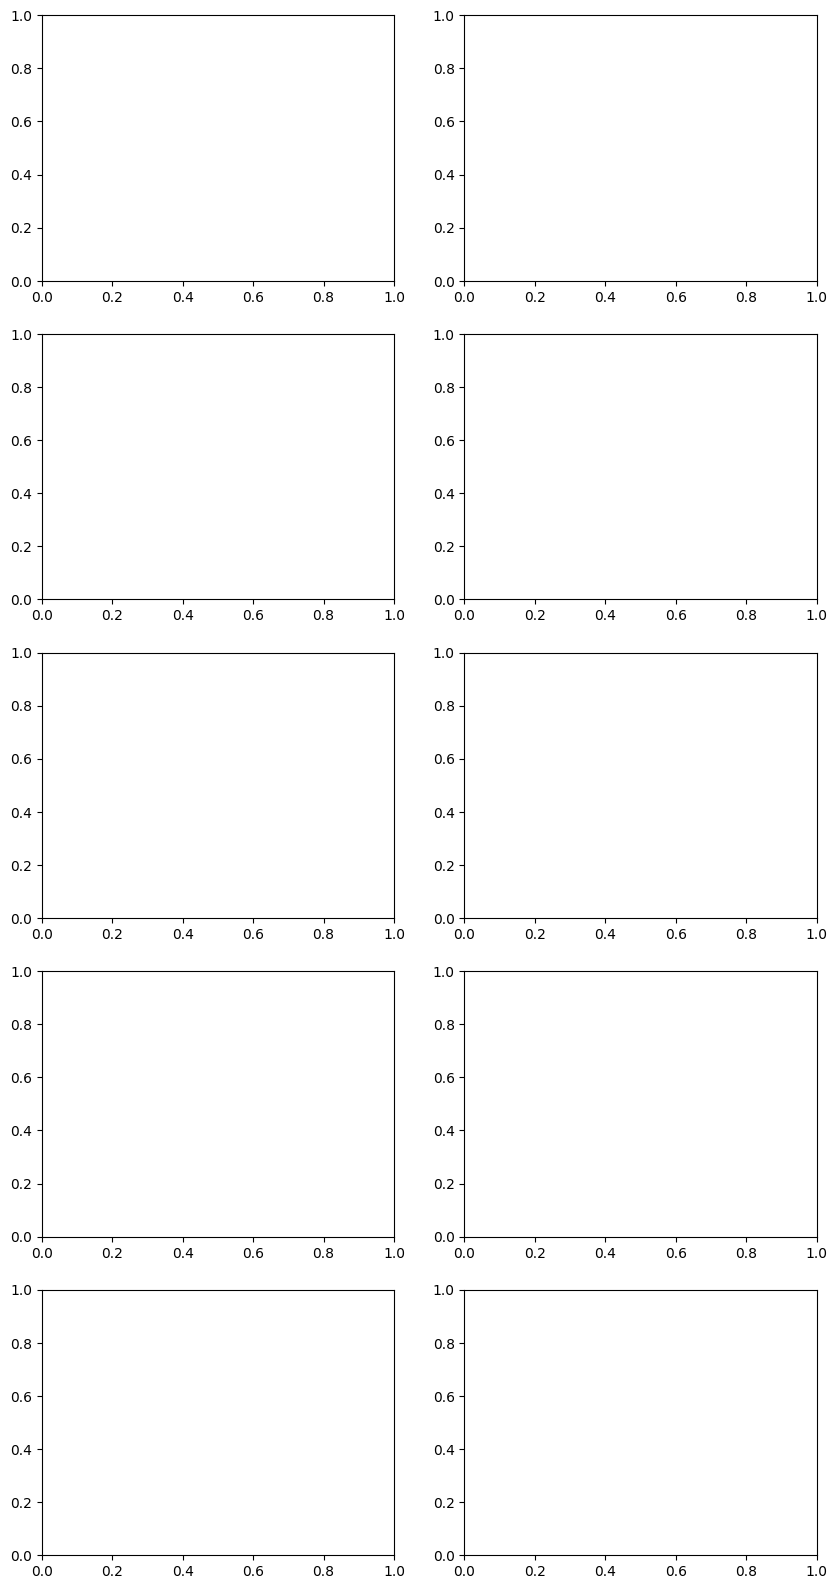

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df_categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week','y']

# Crear un gráficos de barra múltiple
fig, axis = plt.subplots(5, 2, figsize = (10, 20))

for i, categoría in enumerate(df_categoricas):
    row, col = i // 2, i % 2
    sns.countplot(ax=axis[row,col], data=df[df_categoricas], x=categoría)
    if categoría in ["job", "education"]:
        plt.setp(axis[row, col].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()